In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from tensorflow import keras

In [3]:
df = pd.read_csv('merged_new.csv')
df.head(1)


,Date,Air Temperature,Pressure Station Level,Pressure Mean Sea Level,Relative Humidity,Horizontal Visibility,Dew Point Temperature,District,PM2.5,PM10,...,D-1 NO2,D-1 SO2,Date_n,Wind Speed,D-2 PM10,D-3 PM10,D-4 PM10,D-5 PM10,D-6 PM10,D-7 PM10
0,1/1/2013,18.44186,758.686046,759.060465,69.418605,1.77907,11.744186,Kolkata,-1.0,237.83,...,95.48,12.39,0,0.928571,260.03,251.57,239.65,187.02,144.33,165.63


In [119]:
col_list = ["SO2", "D-1 SO2", "Dew Point Temperature", "Relative Humidity"]
target_y = ['SO2']

In [120]:
X = df[col_list][:-1]
y = df[target_y][1:]

In [121]:
calc_test_size = round(X.shape[0]*(1 - 0.2))
x_train = X.iloc[:calc_test_size, :]
x_test = X.iloc[calc_test_size:, :]
y_train = y.iloc[:calc_test_size, :]
y_test = y.iloc[calc_test_size:, :]
xx_train = np.array(x_train)
yy_train = np.array(y_train)
xx_test = np.array(x_test)
yy_test = np.array(y_test)

In [122]:

so2_mlp_obj = keras.models.load_model('saved_models/so2/so2_MLP.h5')
scaler = joblib.load('saved_scalers/so2/so2_mlp_scaler.save')


In [127]:
X = scaler.transform(xx_test)
predicted_result = so2_mlp_obj.predict(X)

In [124]:
# # from sklearn.preprocessing import PolynomialFeatures
# # pf = PolynomialFeatures()
# # x_poly = pf.fit_transform(xx_test)
# predicted_result = so2_forest_obj.predict(xx_train) 

# X = no2_svr_xscaler.transform(xx_train)
# prediction = no2_svr_obj.predict(X)
# predicted_result = no2_svr_yscaler.inverse_transform(prediction)


In [128]:
import matplotlib.pyplot as plt
x = np.arange(len(yy_test))

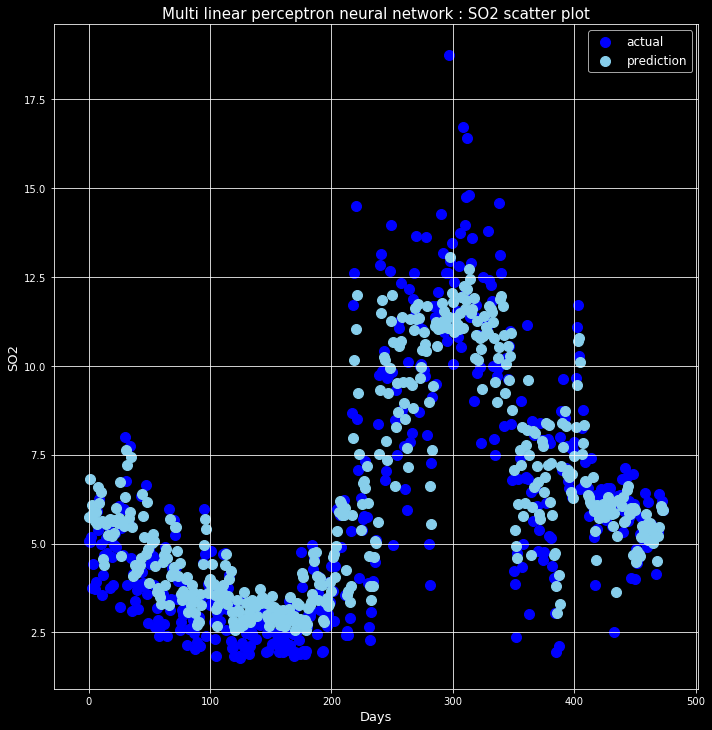

In [129]:
plt.figure(figsize = (10, 10))
plt.style.use('dark_background')
plt.scatter(x, yy_test, label = "actual", c = "b", s = 100)
plt.scatter(x, predicted_result, label = "prediction", c = "skyblue", s = 100)
plt.xlabel("Days", fontsize = 13)
plt.ylabel("SO2", fontsize = 13)
plt.grid()
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.tight_layout()
plt.title("Multi linear perceptron neural network : SO2 scatter plot", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()